# LightOSM.jl Benchmarks

This is a benchmark analysis of __[LightOSM.jl](https://github.com/DeloitteDigitalAPAC/LightOSM.jl)__, a Julia package for downloading, ingesting and analyising geospatial data from OpenStreetMap APIs. __[BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl)__ is used to compare LightOSM's runtime performance for shortest path algorithms (Dijkstra and A*) against two other Julia packages, __[LightGraphs.jl](https://github.com/JuliaGraphs/LightGraphs.jl)__ and __[OpenStreetMapX](https://github.com/pszufe/OpenStreetMapX.jl)__.

## Methodology

This experiment generates a series of random origin-destination nodes for each package to calculate the shortest path between them. The following parameters were used:
- Directed graph with 29718 nodes and 43550 edges
- Experiment sets of 1, 100, 1000 and 10000 random paths

## Notes

- LightOSM shortest path algorithms account for turn restrictions in the OpenStreetMap transport network.
- Precomputing Dijkstra shortest path parent states with LightOSM can significantly improve path calculation (rather, path retrieval) as long as the graph has a reasonable amount of nodes and the user has sufficient memory to perform such an operation. This option is particularly useful if you need to generate paths in the millions.
- Precomputation took roughly 130s in this experiment.
- To replicate this experiment see the __[benchmark directory](https://github.com/DeloitteDigitalAPAC/LightOSM.jl/tree/master/benchmark)__ of LightOSM.
- This experiment was run on a 2019 MacBook Pro with a 2.4 GHz Intel Core i5 processor, 16 GB memory, and macOS Mojave 10.14.6.

## Results

In [1]:
include("benchmark/benchmarks_plot.jl");

### Dijkstra

OpenStreetMapX (osmx) had the longest runtime for the Dijkstra algorithm with 21.54s for 1000 paths, LightGraphs (lg) took half long with 9.54s, LightOSM (losm) took the least amount of time with 5.3s. Runtime for precomputed LightOSM (losm_precomputed) was almost neglible.

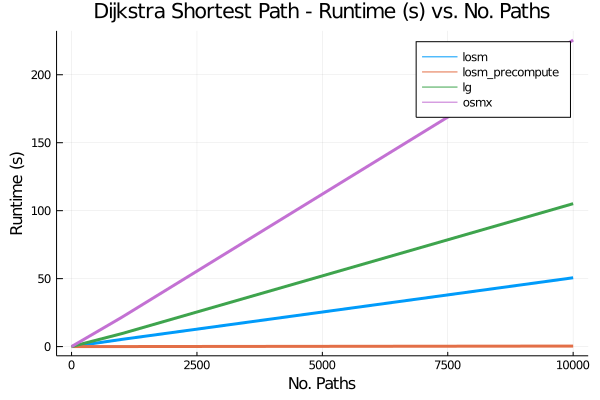

In [29]:
plot_dijkstra_time()

We observe similar results with memory usage.

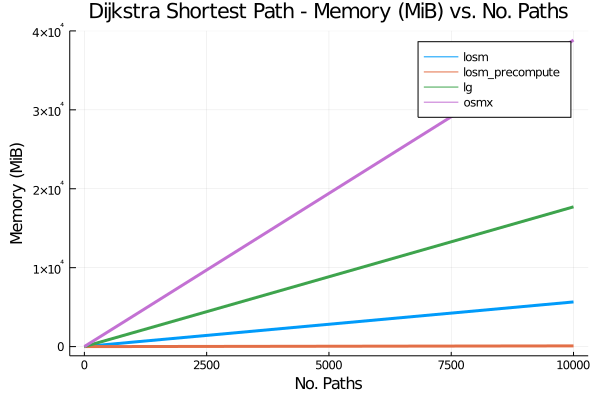

In [30]:
plot_dijkstra_memory()

### A*

LightGraphs had the longest runtime for the A* algorithm with 24.89s for 1000 paths, OpenStreetMapX took less than half as much time with 6.56s, LightOSM again took the least amount of time with 2.73s. Runtime for precomputed LightOSM was again almost neglible.

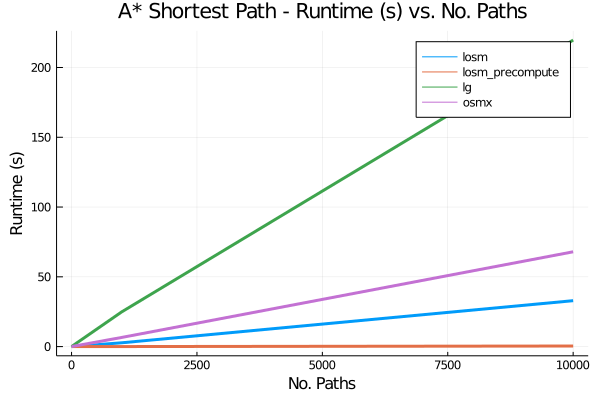

In [31]:
plot_astar_time()

This time we see significantly less memory usage for LightOSM in comparison to the other packages.

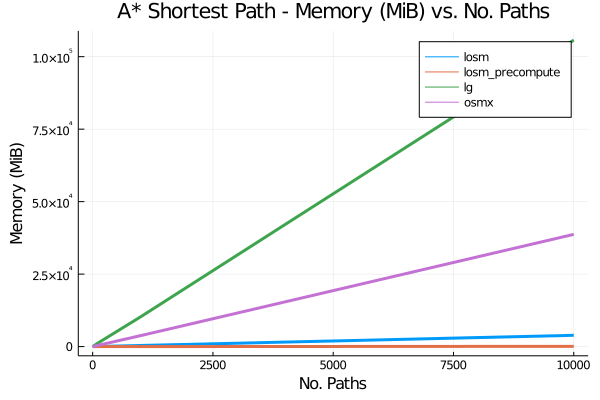

In [32]:
plot_astar_memory()

## Conclusion

LightOSM without precomputation was about 4x faster than OpenStreetMapX and 2x faster than LightGraphs computing Dijkstra shortest paths. Memory usage had similar results.

Meanwhile, LightOSM without precomputation was about 2.5x faster than OpenStreetMapX and 9x faster than LightGraphs computing A* shortest paths. LightOSM used about 10x less memory than OpenStreetMapX and 28x less memory than LightGraphs.

LightOSM runtime retrieval of shortest paths with precomputation was almost neglible.

## Appendix

In [33]:
dijkstra_results

,No. Paths,losm,losm_precompute,osmx,lg
,String,String,String,String,String
1,1,0.0024s (0.45 MiB),0.0s (0.01 MiB),0.0221s (3.98 MiB),0.0102s (1.82 MiB)
2,100,0.5071s (57.27 MiB),0.0038s (0.85 MiB),2.19s (397.7 MiB),1.003s (182.96 MiB)
3,1000,5.3s (572.84 MiB),0.0355s (8.66 MiB),21.538s (3880.0 MiB),9.544s (1770.0 MiB)
4,10000,50.649s (5660.0 MiB),0.3819s (89.42 MiB),225.518s (38840.0 MiB),105.162s (17710.0 MiB)


In [34]:
astar_results

,No. Paths,losm,losm_precompute,osmx,lg
,String,String,String,String,String
1,1,0.0s (0.36 MiB),0.0s (0.01 MiB),0.0048s (3.37 MiB),0.0046s (2.6 MiB)
2,100,0.2896s (39.9 MiB),0.003s (0.85 MiB),0.7017s (403.59 MiB),2.532s (1130.0 MiB)
3,1000,2.73s (394.4 MiB),0.0355s (8.66 MiB),6.564s (3800.0 MiB),24.886s (10310.0 MiB)
4,10000,32.908s (3900.0 MiB),0.4106s (89.42 MiB),67.941s (38720.0 MiB),219.653s (105730.0 MiB)
